In [63]:
#from rlberry.agents.torch import PPOAgent
#from rlberry.agents.torch import TRPOAgent
#from rlberry.envs.benchmarks.bullet3.pybullet_envs.gym_pendulum_envs import PendulumBulletEnv
#from rlberry.envs.benchmarks.bullet3.pybullet_envs.robot_bases import MJCFBasedRobot2
#from rlberry.envs.benchmarks.bullet3.pybullet_envs.robot_pendula import Pendulum


## Import benchmark csv

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import os
import glob

PATH = './benchmarks'
csv_files = glob.glob(os.path.join(PATH, "*.csv"))
  
# loop over the list of csv files
benchmark = {}
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col=0)
      
    # print the location and filename
    # print('Location:', f)
    print('File Name:', f.split("/")[-1])
    
    # print the content
    # print('Content:')
    # display(df)
    # print()
    benchmark[f.split("/")[-1]] = df


File Name: PPO_BallLevel1.csv
File Name: PPO_BallLevel2.csv
File Name: PPO_BallLevel3.csv
File Name: PPO_BallLevel4.csv
File Name: PPO_BallLevel5.csv
File Name: PPO_PBall2D.csv
File Name: PPO_brm_BallLevel1.csv
File Name: PPO_brm_BallLevel2.csv
File Name: PPO_brm_BallLevel3.csv
File Name: PPO_brm_BallLevel4.csv
File Name: PPO_brm_BallLevel5.csv
File Name: PPO_brm_PBall2D.csv
File Name: TRPO_BallLevel1.csv
File Name: TRPO_BallLevel2.csv
File Name: TRPO_BallLevel3.csv
File Name: TRPO_BallLevel4.csv
File Name: TRPO_BallLevel5.csv
File Name: TRPO_PBall2D.csv
File Name: PPO_CartPoleBulletEnv.csv
File Name: PPO_RacecarGymEnv.csv
File Name: PPO_brm_CartPoleBulletEnv.csv
File Name: PPO_brm_RacecarGymEnv.csv
File Name: TRPO_CartPoleBulletEnv.csv
File Name: TRPO_RacecarGymEnv.csv


In [66]:
bench = 'PPO_RacecarGymEnv'
df = benchmark[bench + '.csv']
df.tag.unique()

array(['episode_rewards', 'dw_time_elapsed', 'fit/surrogate_loss',
       'fit/entropy_loss', 'fit/value_fct_loss', 'avg_reward',
       'trained_reward'], dtype=object)

## Reward per step

In [73]:
def graph_plot(benchmark_used,algorithm, tag):
    fig, ax = plt.subplots(1,len(benchmark_used),figsize=(15,6))

    for idx,bench in enumerate(benchmark_used):
        for algo in algorithm: 
            df = benchmark[algo + '_' + bench +  '.csv']
            ax[idx].plot(df[df.tag == tag].global_step,  df[df.tag == tag].value, label=algo, dashes=[6, 2])

        plt.suptitle(f"{tag} per global_step\n", size=20)
        ax[idx].set_xlabel("global_step")
        ax[idx].set_ylabel(f"{tag}")
        ax[idx].grid(True, linestyle='-.')
        ax[idx].set_title(f"{bench}")
        ax[idx].tick_params(labelsize='medium', width=3)
        ax[idx].legend(loc='lower right')

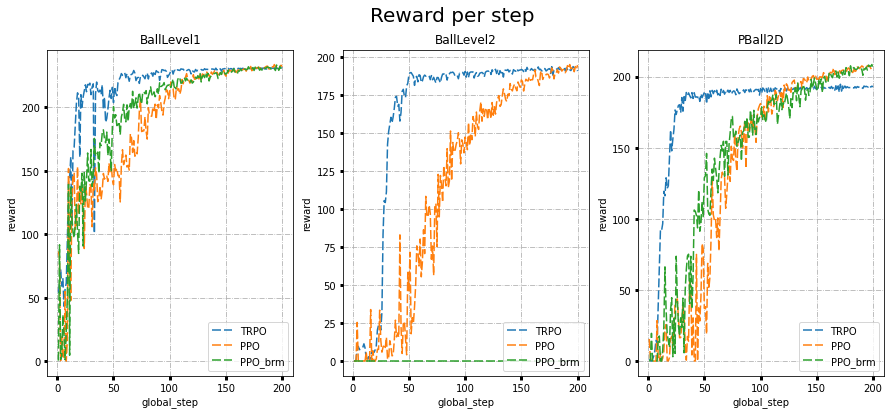

In [65]:
benchmark_used = ['BallLevel1','BallLevel2','PBall2D']
algorithm = ['TRPO', 'PPO', 'PPO_brm']
tag = 'episode_rewards'

fig, ax = plt.subplots(1,len(benchmark_used),figsize=(15,6))

for idx,bench in enumerate(benchmark_used):
    for algo in algorithm: 
        df = benchmark[algo + '_' + bench +  '.csv']
        ax[idx].plot(df[df.tag == 'episode_rewards'].global_step,  df[df.tag == 'episode_rewards'].value, label=algo, dashes=[6, 2]) #, color = 'red')
    #scores_err = np.array(scores[solver]['time'])*0.05
    #ax.fill_between(np.array(noises)*100, np.array(scores[solver]['time']) - scores_err, np.array(scores[solver]['time']) + scores_err, alpha=0.2, color = color_solver(solver))

    #ax[idx].xaxis.set_major_formatter(mtick.PercentFormatter())

    plt.suptitle(f"Reward per step\n", size=20)
    ax[idx].set_xlabel("global_step")
    ax[idx].set_ylabel("reward")
    ax[idx].grid(True, linestyle='-.')
    ax[idx].set_title(f"{bench}")
    ax[idx].tick_params(labelsize='medium', width=3)
    ax[idx].legend(loc='lower right')

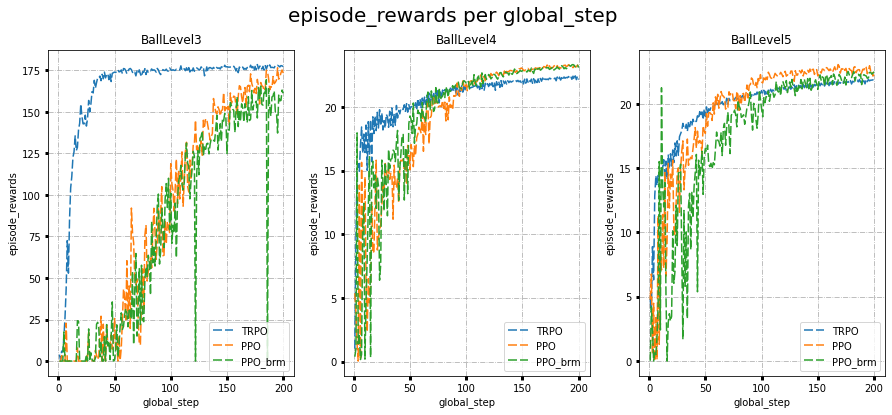

In [77]:
benchmark_used = ['BallLevel3','BallLevel4','BallLevel5']
algorithm = ['TRPO', 'PPO', 'PPO_brm']
tag = 'episode_rewards'

graph_plot(benchmark_used,algorithm, tag)

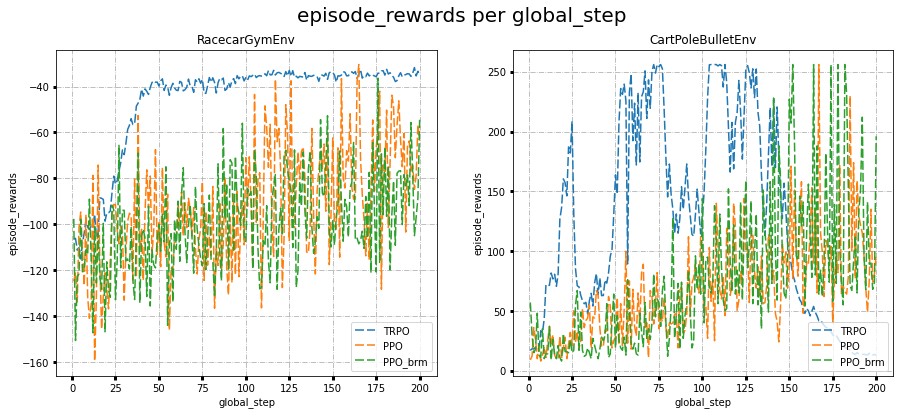

In [78]:
benchmark_used = ['RacecarGymEnv','CartPoleBulletEnv']
algorithm = ['TRPO', 'PPO', 'PPO_brm']
tag = 'episode_rewards'

graph_plot(benchmark_used,algorithm, tag)

## Entropy_loss

In [84]:
def graph_plot(benchmark_used,algorithm, tags):
    fig, ax = plt.subplots(1,len(benchmark_used),figsize=(15,6))

    colors= {'PPO_brm' : 'r', 'PPO': 'b'}

    for idx,bench in enumerate(benchmark_used):
        for algo in algorithm: 
            df = benchmark[algo + '_' + bench +  '.csv']
            for tag in tags:
                ax[idx].plot(df[df.tag == tag].global_step,  df[df.tag == tag].value, label=algo, dashes=[6, 2], color=)

        plt.suptitle(f"{tag} per global_step\n", size=20)
        ax[idx].set_xlabel("global_step")
        ax[idx].set_ylabel(f"{tag}")
        ax[idx].grid(True, linestyle='-.')
        ax[idx].set_title(f"{bench}")
        ax[idx].tick_params(labelsize='medium', width=3)
        ax[idx].legend(loc='lower right')

TypeError: not all arguments converted during string formatting

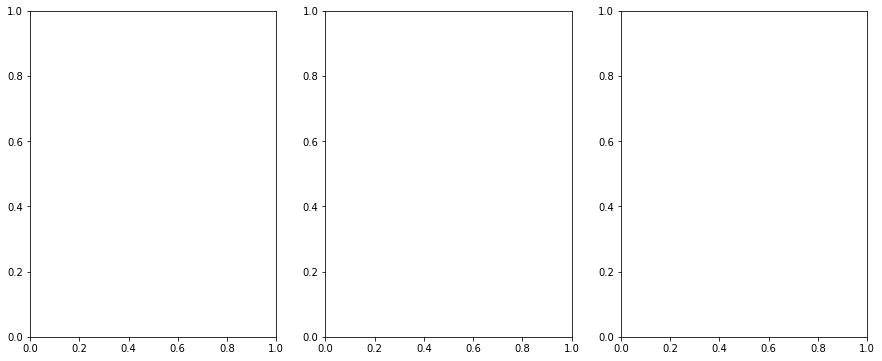

In [85]:
benchmark_used = ['BallLevel1','BallLevel2','PBall2D']
algorithm = ['PPO_brm', 'PPO']
tag = ['fit/entropy_loss','fit/surrogate_loss'] #,'fit/value_fct_loss']

graph_plot(benchmark_used,algorithm, tag)

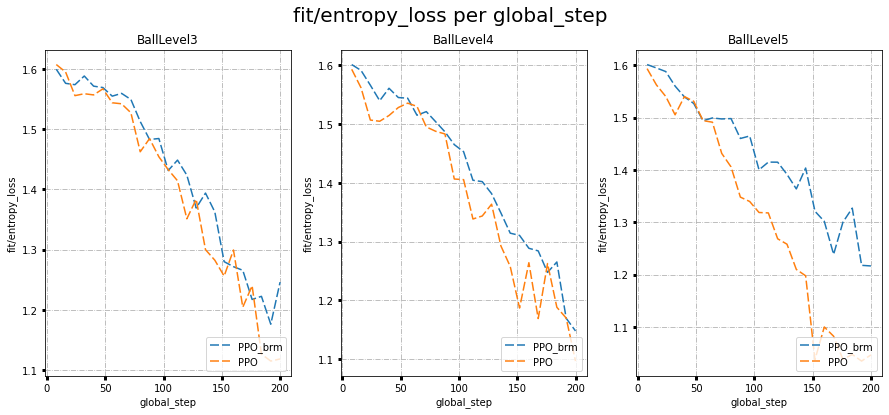

In [74]:
benchmark_used = ['BallLevel3','BallLevel4','BallLevel5']
algorithm = ['PPO_brm', 'PPO']
tag = 'fit/entropy_loss'

graph_plot(benchmark_used,algorithm, tag)

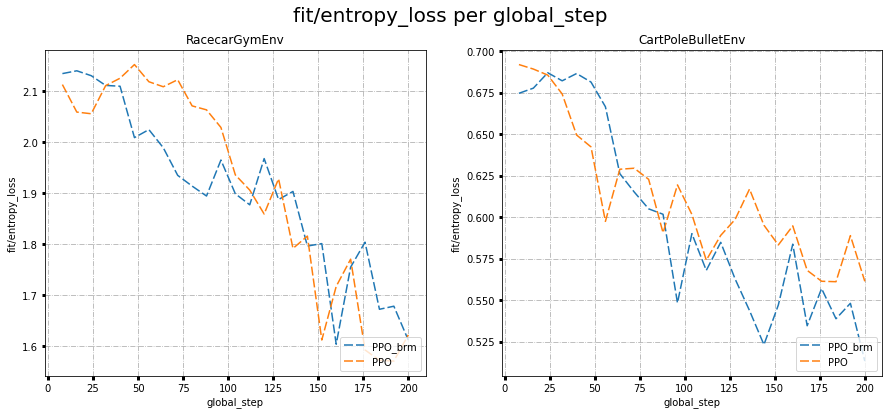

In [75]:
benchmark_used = ['RacecarGymEnv','CartPoleBulletEnv']
algorithm = ['PPO_brm', 'PPO']
tag = 'fit/entropy_loss'

graph_plot(benchmark_used,algorithm, tag)